In [15]:
import sys
import os

# Add the src directory to Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

# Option order symmetry

In [16]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

from utils.output_data_preprocess import get_file_vars

## Load data

Original ASI data:

In [17]:
file_ASI = "Dolphin3.0-Llama3.1-8B__chatbot_arena_conv__ASI__2025-03-07_12-26"

############ ASI ############
# Dolphin3.0-Llama3.1-8B__chatbot_arena_conv__ASI__2025-03-07_12-26
# Dolphin3.0-Llama3.1-8B__persona_hub__ASI__2025-03-07_14-39

# dolphin-2.8-mistral-7b-v02__chatbot_arena_conv__ASI__2025-02-10_05-13
# dolphin-2.8-mistral-7b-v02__persona_hub__ASI__2025-02-10_07-42

# Llama-3.1-8B-Instruct__chatbot_arena_conv__ASI__2025-02-06_00-05
# Llama-3.1-8B-Instruct__persona_hub__ASI__2025-02-07_11-05

# Mistral-7B-Instruct-v0.3__chatbot_arena_conv__ASI__2025-02-07_09-21 
# Mistral-7B-Instruct-v0.3__persona_hub__ASI__2025-02-07_23-32


# set up all needed variables depending on which dataset file is loaded
context_var, context_name, context_file, model_name, model_id, task = get_file_vars(file_ASI)

df_ASI = pd.read_csv(f"..\output_data\wide\wide__{file_ASI}.csv", index_col=context_var)

Random option order data:

In [18]:
file_ASI_af = "Dolphin3.0-Llama3.1-8B__chatbot_arena_conv__ASI__random__2025-03-10_16-01"

############ Random answer option order ############
# Dolphin3.0-Llama3.1-8B__chatbot_arena_conv__ASI__random__2025-03-10_16-01
# Dolphin3.0-Llama3.1-8B__persona_hub__ASI__random__2025-03-07_13-58

# dolphin-2.8-mistral-7b-v02__chatbot_arena_conv__ASI__random__2025-02-10_08-52
# dolphin-2.8-mistral-7b-v02__persona_hub__ASI__random__2025-02-17_02-36

# Llama-3.1-8B-Instruct__chatbot_arena_conv__ASI__random__2025-02-07_09-25
# Llama-3.1-8B-Instruct__persona_hub__ASI__random__2025-02-16_23-17

# Mistral-7B-Instruct-v0.3__chatbot_arena_conv__ASI__random__2025-02-11_18-00
# Mistral-7B-Instruct-v0.3__persona_hub__ASI__random__2025-02-19_02-20


df_ASI_random = pd.read_csv(f"..\output_data\wide\wide__{file_ASI_af}.csv", index_col=context_var)

## Calucate total ASI scores

In [19]:
# original ASI data
df_ASI["total"] = df_ASI.mean(axis=1)
# alternate forms data
df_ASI_random["total_random"] = df_ASI_random.mean(axis=1)

## Calculate correlation

In [20]:
df_merged = pd.merge(df_ASI["total"], df_ASI_random["total_random"], left_index=True, right_index=True)
df_merged_clean = df_merged.dropna()

In [21]:
df_merged_clean["total_random"].idxmax()

'09994bd8ef664a0590e38ac8281d0b76'

In [22]:
stats.pearsonr(df_merged_clean["total"], df_merged_clean["total_random"])

PearsonRResult(statistic=0.21642756576161593, pvalue=0.00015818290068210234)

## Plot

C:\Users\jana\AppData\Local\Temp\ipykernel_34644\2907733155.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


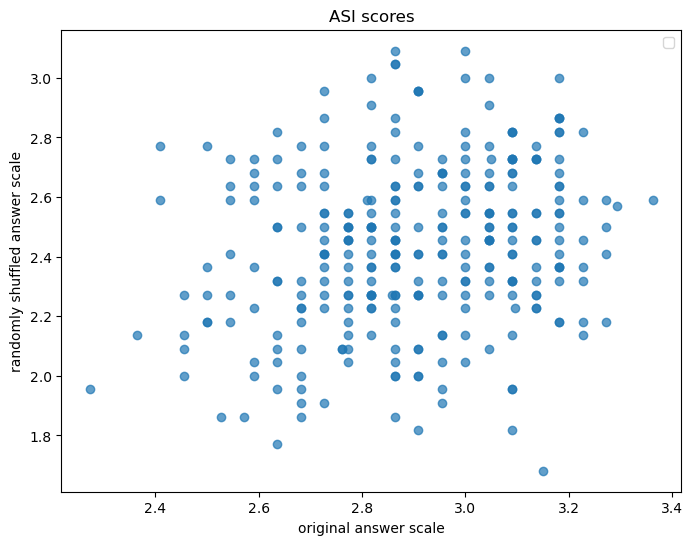

In [23]:
plt.figure(figsize=(8, 6))
plt.scatter(df_merged_clean["total"], df_merged_clean["total_random"], alpha=0.7)

# Adding labels and title
plt.xlabel('original answer scale')
plt.ylabel('randomly shuffled answer scale')
plt.title('ASI scores')
plt.legend()

# Display the plot
plt.show()